Business Analytics: Customer Segmentation using K-Means Clustering
You are a business analyst consultant working with a retail company that wants to segment its customer base. Your goal is to build a clustering model to identify distinct customer segments using K-Means clustering.

In [ ]:
# Loading neccesary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import pairwise
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score # Performance measure – Accuracy
import math

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
plt.style.use('default')

In [ ]:
%matplotlib inline
# without this the plots would be opened  in a new window (not browser)
# with this instruction plots will be included in the notebook


In [ ]:
# Use %config InlineBackend.figure_format = 'retina'
# after %matplotlib inline to render higher resolution images
%config InlineBackend.figure_format = 'retina'

In [ ]:
# If you wish to use Google colab, the following code will allow you to mount your Google Drive.
# Otherwise, comment on the following lines.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# To print multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)


# Import dataset

In [ ]:

#Reading the data from google drive
data=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/customer_segmentation.csv')
#Print that data imported successfully
print("Data imported successfully")



Data imported successfully



1. **Data Cleaning & Wrangling**:
   - Load the dataset and handle missing or inconsistent values.
   - Convert categorical variables into numerical representations.



In [ ]:
data

,Age,Gender,Income,Marital_Status,Children,Car_Loan,Home_Mortgage
0,48,Female,17546.00,Single,1,No,No
1,40,Male,30085.10,Married,3,Yes,Yes
2,51,Female,16575.40,Married,0,Yes,No
3,23,Female,20375.40,Married,3,No,No
4,57,Female,50576.30,Married,0,No,No
...,...,...,...,...,...,...,...
595,61,Female,47025.00,Single,2,Yes,Yes
596,30,Female,9672.25,Married,0,Yes,No
597,31,Female,15976.30,Married,0,Yes,No
598,29,Male,14711.80,Married,0,No,Yes


In [ ]:
# Check for missing values
print(data.isnull().sum())

Age               0
Gender            0
Income            0
Marital_Status    0
Children          0
Car_Loan          0
Home_Mortgage     0
dtype: int64


# Result: there is no missing values

In [ ]:
data.describe().T.round()
data.info()

,count,mean,std,min,25%,50%,75%,max
Age,600.0,42.0,14.0,18.0,30.0,42.0,55.0,67.0
Income,600.0,27524.0,12899.0,5014.0,17264.0,24925.0,36173.0,63130.0
Children,600.0,1.0,1.0,0.0,0.0,1.0,2.0,3.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             600 non-null    int64  
 1   Gender          600 non-null    object 
 2   Income          600 non-null    float64
 3   Marital_Status  600 non-null    object 
 4   Children        600 non-null    int64  
 5   Car_Loan        600 non-null    object 
 6   Home_Mortgage   600 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 32.9+ KB



2. **Data Preprocessing & Feature Engineering**:
   - Normalize/scale numerical variables to ensure fair clustering.
   - Apply one-hot encoding or label encoding for categorical variables.


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
categorical_cols = ['Gender', 'Marital_Status', 'Car_Loan', 'Home_Mortgage']

for col in categorical_cols:
    label_encoders[col] = LabelEncoder() # saving a LabelEncoder instance for each column for inverse transform later if needed
    data[col] = label_encoders[col].fit_transform(data[col])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             600 non-null    int64  
 1   Gender          600 non-null    int64  
 2   Income          600 non-null    float64
 3   Marital_Status  600 non-null    int64  
 4   Children        600 non-null    int64  
 5   Car_Loan        600 non-null    int64  
 6   Home_Mortgage   600 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 32.9 KB



3. **Exploratory Data Analysis (EDA)**:
   - Generate summary statistics of the dataset.
   - Visualize the distribution of numerical features using histograms or box plots.
   - Use correlation analysis to understand relationships between features.


In [ ]:
# seeing the unique data, to see each there are any abnormality found, it is a good method to check binary columns like car_loan
for column in data.columns:
  print(f"Column: {column}")
  print(f"Unique Values: {data[column].unique()}")
  print("-" * 50)

Column: Age
Unique Values: [48 40 51 23 57 22 58 37 54 66 52 44 36 38 46 62 31 61 50 27 56 45 39 20
 33 43 19 55 47 67 32 64 29 24 63 28 34 42 65 21 41 30 25 59 35 53 18 49
 26 60]
--------------------------------------------------
Column: Gender
Unique Values: [0 1]
--------------------------------------------------
Column: Income
Unique Values: [17546.   30085.1  16575.4  20375.4  50576.3  37869.6   8877.07 24946.6
 25304.3  24212.1  59803.9  26658.8  15735.8  55204.7  19474.6  22342.1
 17729.8  41016.   26909.2  22522.8  57880.7  16497.3  38446.6  15538.8
 12640.3  41034.   20809.7  20114.   29359.1  24270.1  22942.9  16325.8
 23443.2  29921.3  37521.9  19868.   10953.   13381.   18504.3  25391.5
 26774.2  26952.6  55716.5  27571.5  13740.   52670.6  13283.9  13106.6
 39547.8  17867.3  14309.7  23894.8  16259.7  29794.1  56842.5  47835.8
 24977.5  23124.9  15143.8  25334.3  24763.3  36589.   27022.6  11700.4
  5014.21 17390.1  10861.   34892.9  19403.1  10441.9  14064.9   8062.73
 3

In [ ]:
data.columns

Index(['Age', 'Gender', 'Income', 'Marital_Status', 'Children', 'Car_Loan',
       'Home_Mortgage'],
      dtype='object')

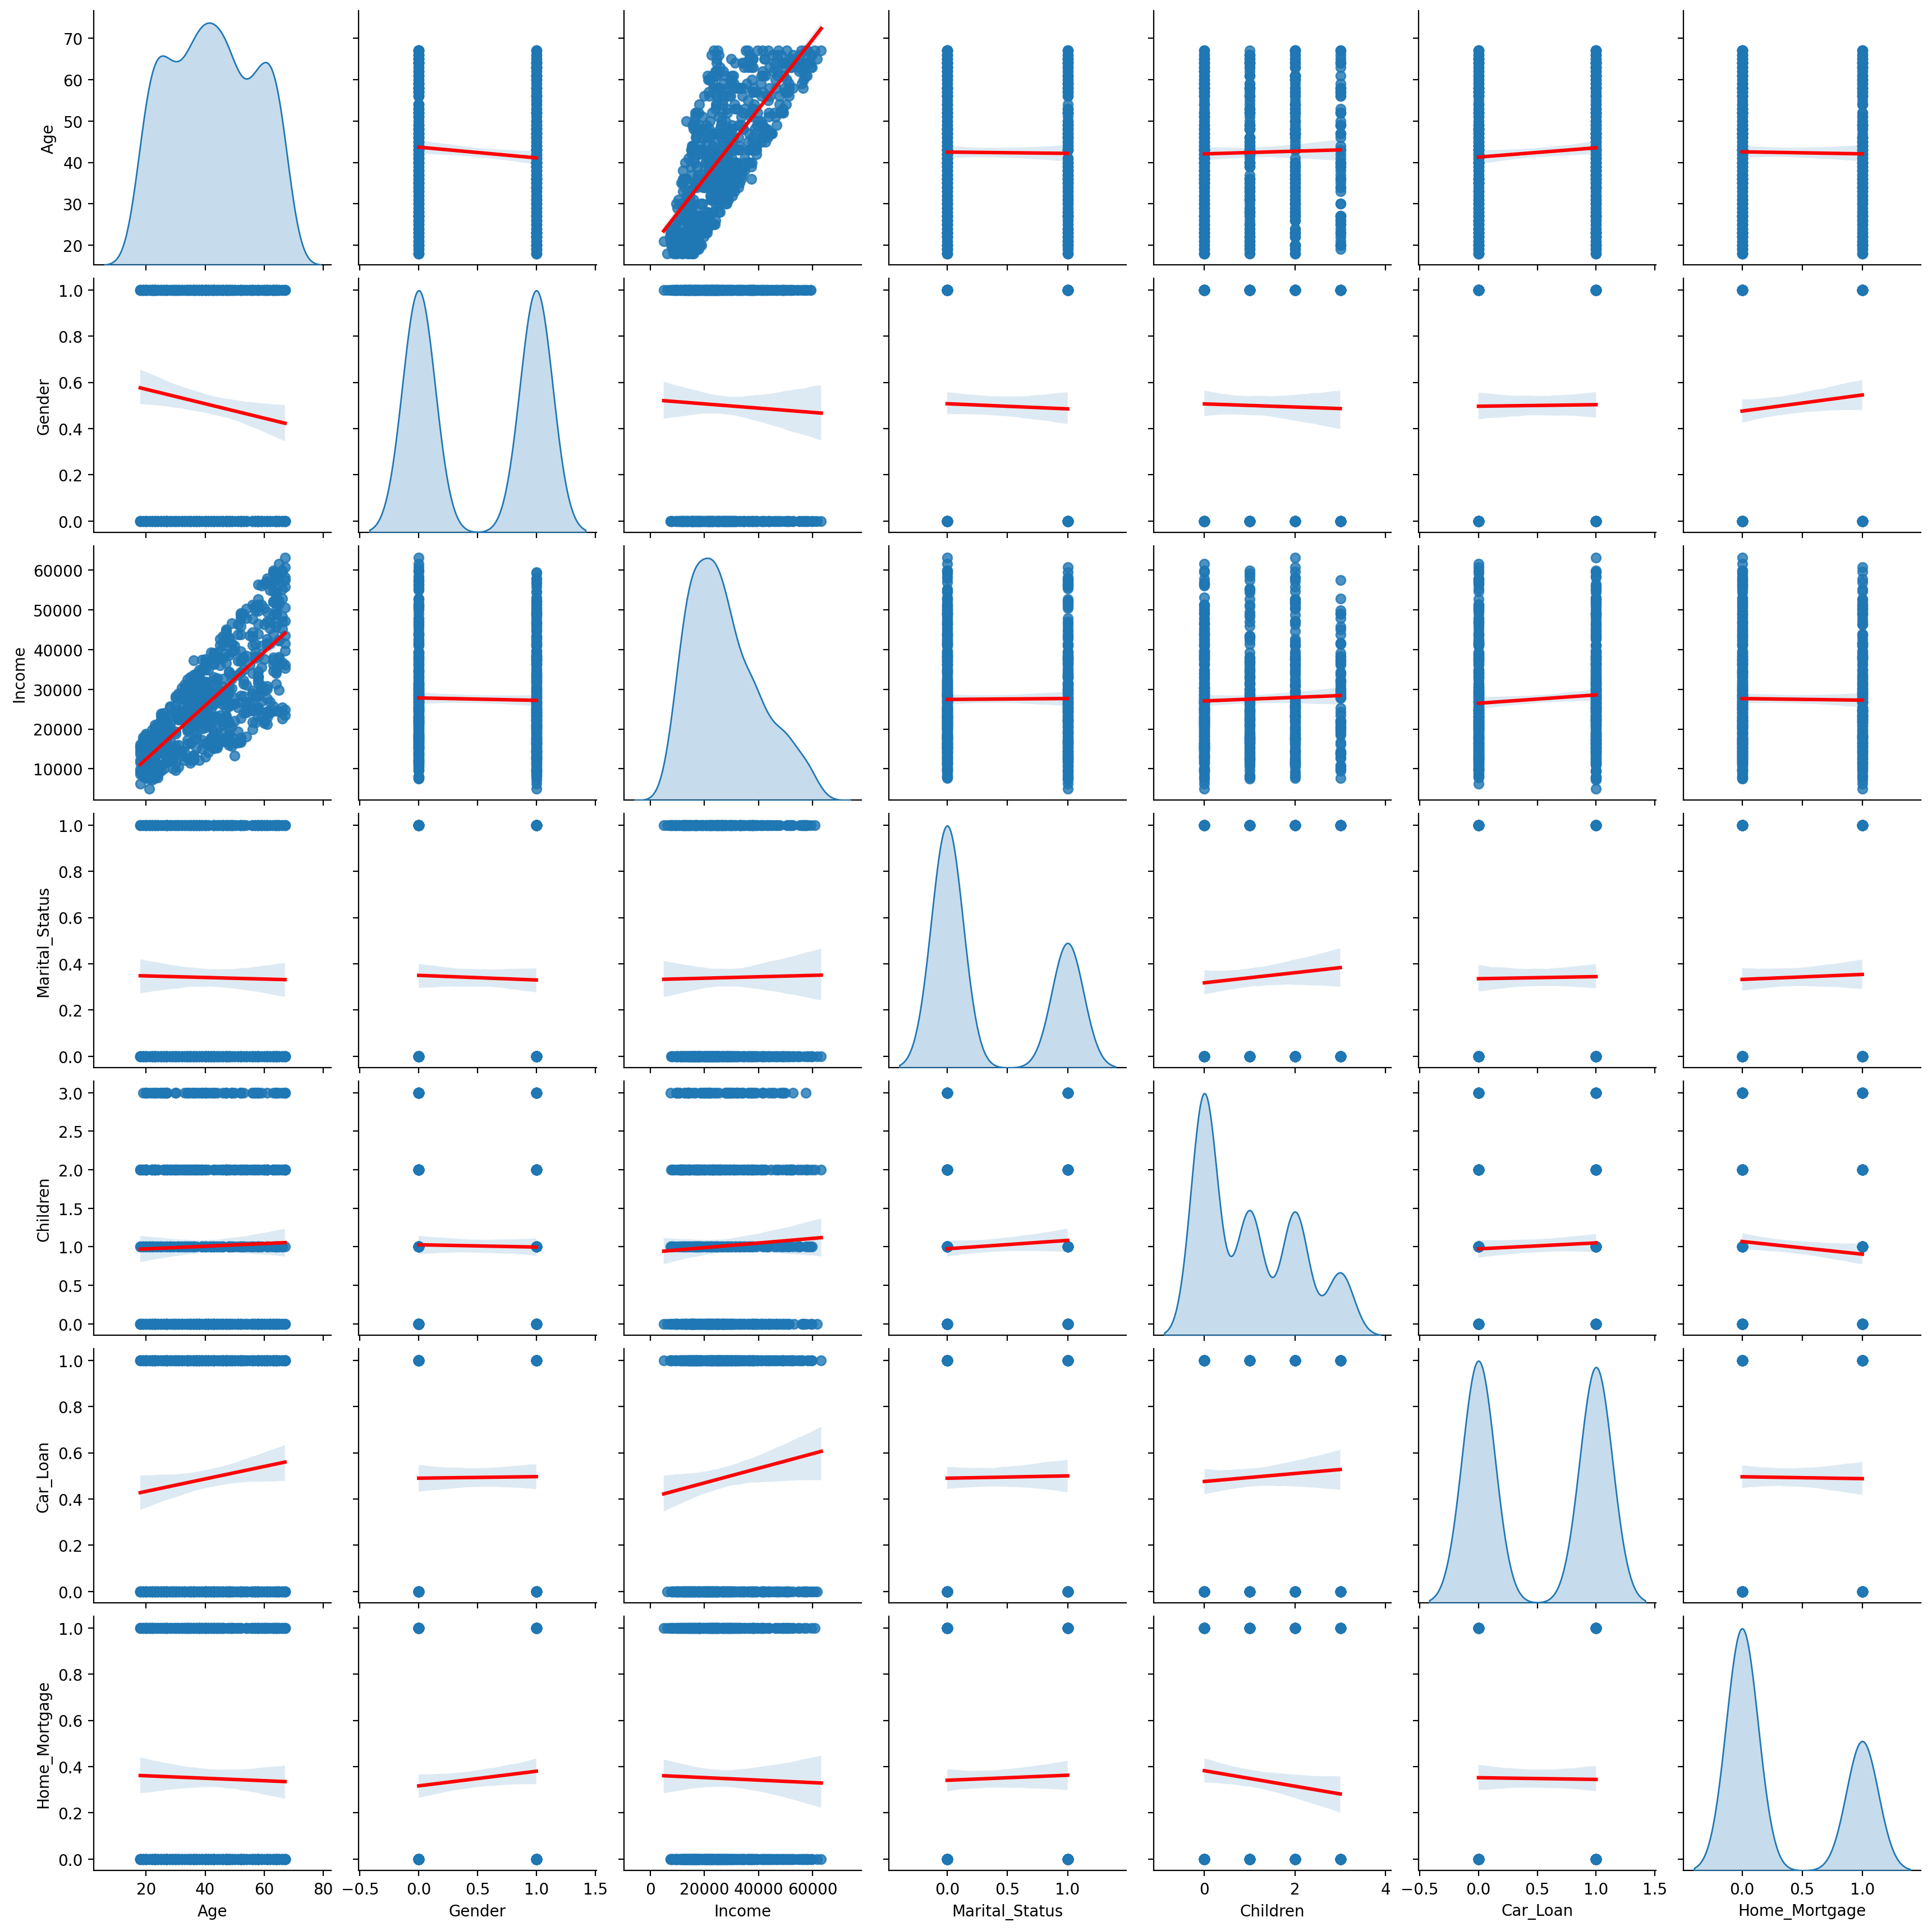

In [ ]:
# If a relationship is linear, the regression line will show that.
# Steep slopes = stronger relationships.
# Flat lines = weaker or no relationship.


plot = sns.pairplot(data[['Age', 'Gender', 'Income', 'Marital_Status', 'Children', 'Car_Loan', 'Home_Mortgage']], kind='reg', diag_kind='kde')
for ax in plot.axes.flatten():
    for line in ax.lines:
        line.set_color('red')
plt.show()


The scatterplot between Income and age has a positive slope → higher income might be associated with higher age, older people.

The scatterplot between Gender and Car loan has no pattern → no clear relationship between them.

# Check for Multicollinearity

<Axes: >

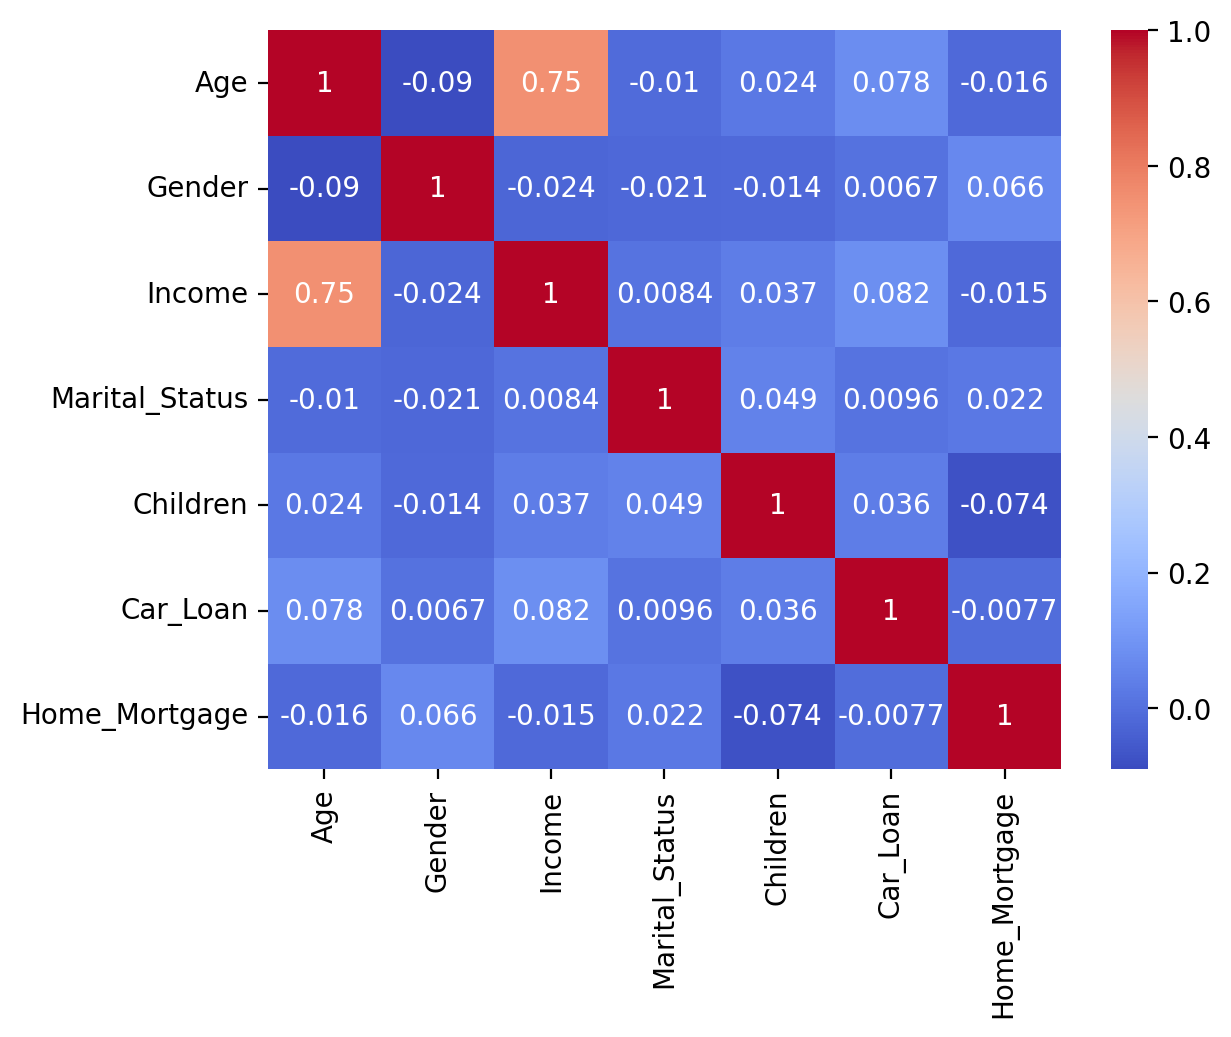

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


<Axes: xlabel='Age', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Age')

<Axes: xlabel='Gender', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Gender')

<Axes: xlabel='Income', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Income')

<Axes: xlabel='Marital_Status', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Marital_Status')

<Axes: xlabel='Children', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Children')

<Axes: xlabel='Car_Loan', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Car_Loan')

<Axes: xlabel='Home_Mortgage', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Home_Mortgage')

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

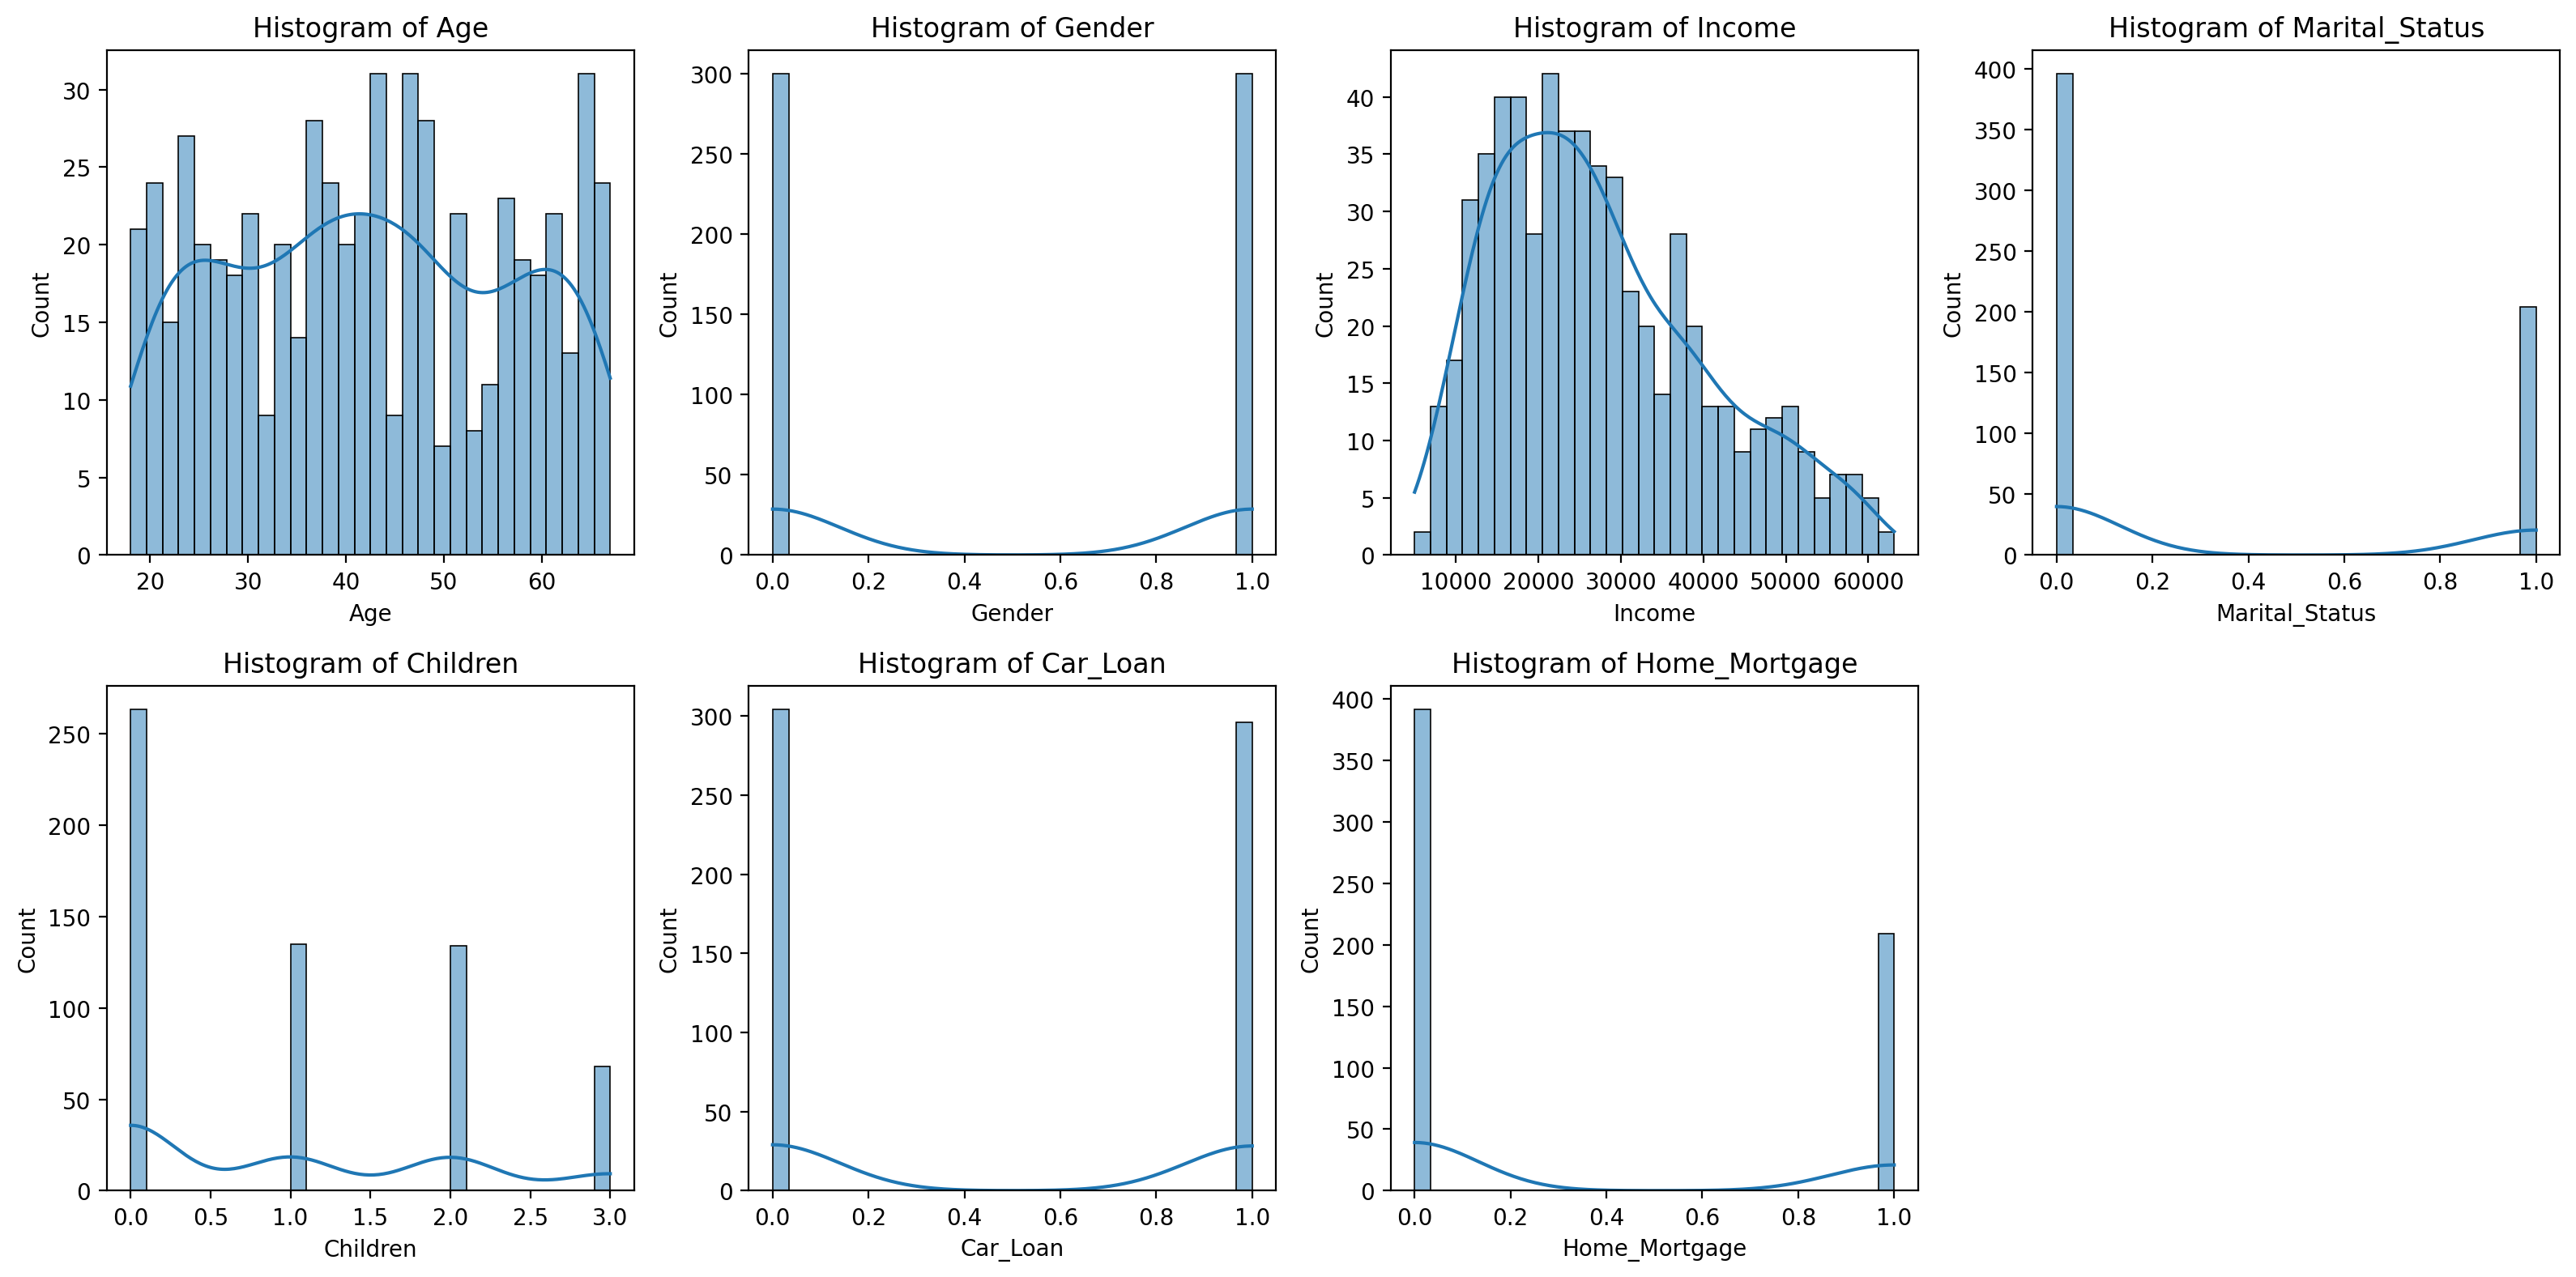

In [ ]:
# Plot histograms

columns = ['Age', 'Gender', 'Income', 'Marital_Status', 'Children', 'Car_Loan', 'Home_Mortgage']

# Count how many plots we need
num_plots = len(columns)

# Define number of plots per row (can adjust if you want)
cols = 4
rows = math.ceil(num_plots / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate(columns):
    sns.histplot(data[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')

# Hide any extra axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


<Axes: ylabel='Age'>

Text(0.5, 1.0, 'Boxplot of Age')

<Axes: ylabel='Gender'>

Text(0.5, 1.0, 'Boxplot of Gender')

<Axes: ylabel='Income'>

Text(0.5, 1.0, 'Boxplot of Income')

<Axes: ylabel='Marital_Status'>

Text(0.5, 1.0, 'Boxplot of Marital_Status')

<Axes: ylabel='Children'>

Text(0.5, 1.0, 'Boxplot of Children')

<Axes: ylabel='Car_Loan'>

Text(0.5, 1.0, 'Boxplot of Car_Loan')

<Axes: ylabel='Home_Mortgage'>

Text(0.5, 1.0, 'Boxplot of Home_Mortgage')

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

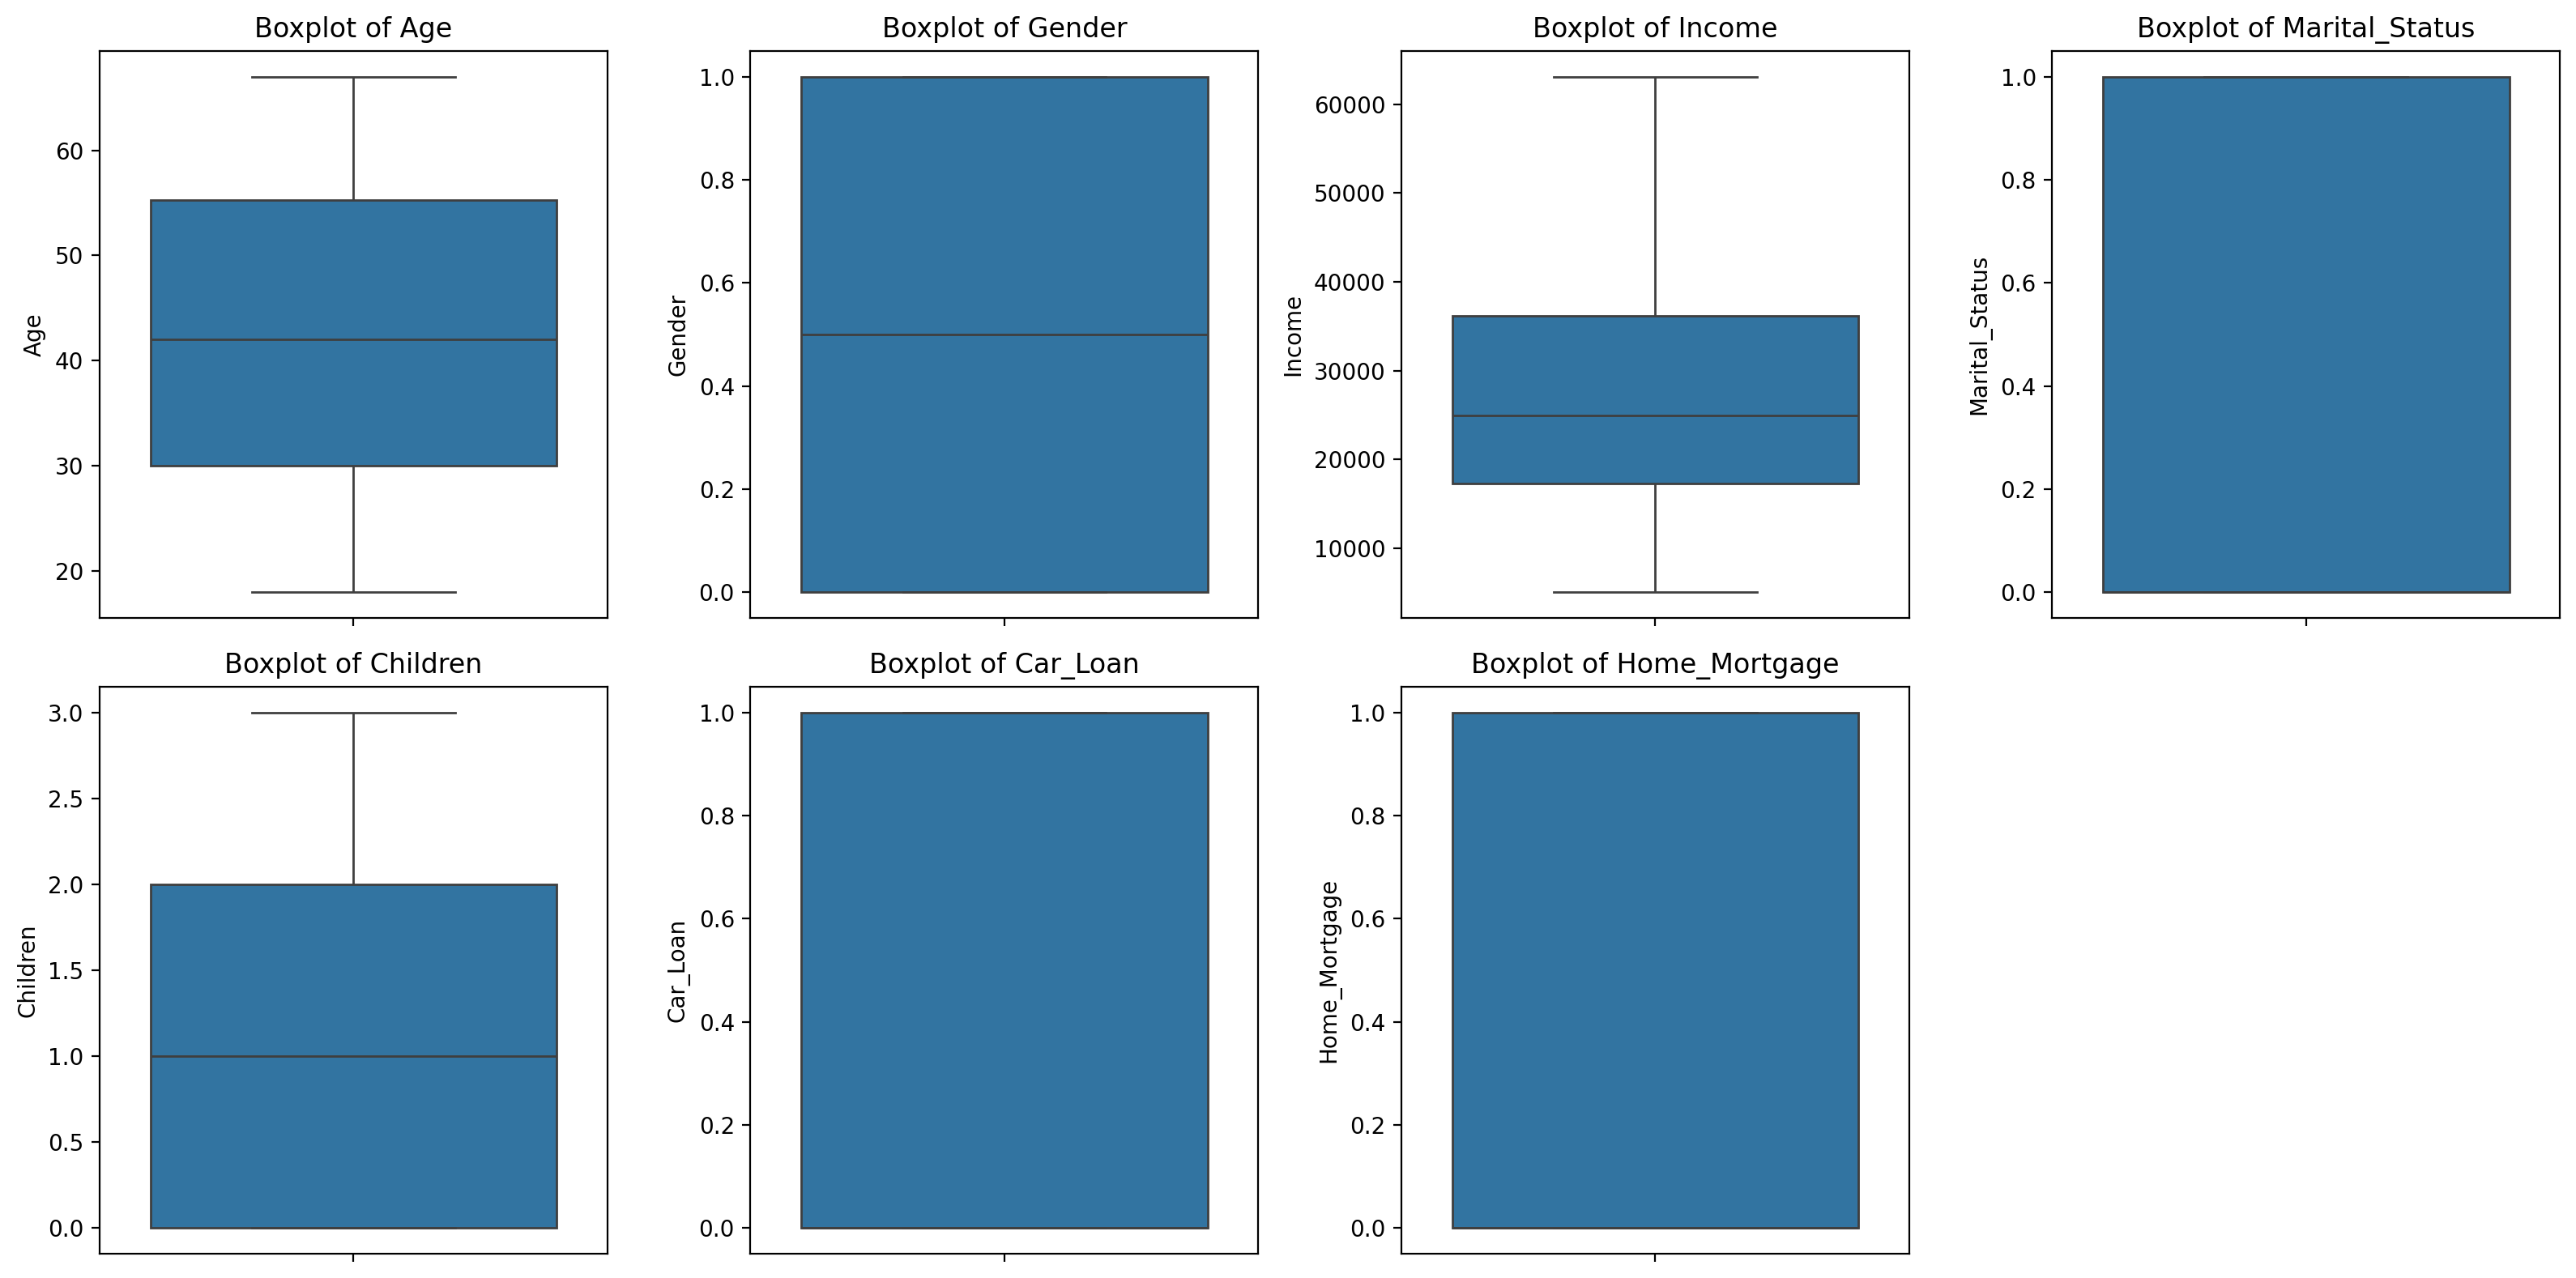

In [ ]:
# Plot boxplots
# Number of plots needed
num_plots = len(columns)

# Automatically calculate rows and columns for subplots
cols = 4  # number of plots per row
rows = math.ceil(num_plots / cols)

# Set up the figure
fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
axes = axes.flatten()  # Flatten in case of multiple rows

# Plot each boxplot
for i, col in enumerate(columns):
    sns.boxplot(y=data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


4. **Feature Selection** *(if needed)*:
   - Analyze and decide if all features are useful for clustering.



# I dropped Age because it has high correlated with Income, one of them enough for my model

In [ ]:
data.drop('Age', axis=1, inplace=True)

# Normalize the data in order to use in our model

In [ ]:
# Normalize the data
x = data.values #numpy array
min_max_scaler = preprocessing.MinMaxScaler() # Scales features to a fixed range [0, 1], it preserves the shape of the original distribution, but squishes values into [0, 1]. [when data are not normally distributed]
                                              # why not StandardScaler() because it standardizes features to have mean = 0 and std = 1. [when our data is kinda normally distributed, we use StandardScaler.]
x_scaled = min_max_scaler.fit_transform(x)
scaled_data = pd.DataFrame(x_scaled)
# see the results
scaled_data.head()

,0,1,2,3,4,5
0,0.0,0.215634,1.0,0.333333,0.0,0.0
1,1.0,0.431395,0.0,1.000000,1.0,1.0
2,0.0,0.198933,0.0,0.000000,1.0,0.0
3,0.0,0.264320,0.0,1.000000,0.0,0.0
4,0.0,0.783987,0.0,0.000000,0.0,0.0


5. **Find the Optimum Number of Clusters (k)**:
   - Determine the best value of `k`.



In [ ]:
# Install kneed if needed
# !pip install kneed

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

KMeans(n_clusters=5, random_state=42)

KMeans(n_clusters=6, random_state=42)

KMeans(n_clusters=7, random_state=42)

KMeans(random_state=42)

KMeans(n_clusters=9, random_state=42)

KMeans(n_clusters=10, random_state=42)

KMeans(n_clusters=11, random_state=42)

KMeans(n_clusters=12, random_state=42)

KMeans(n_clusters=13, random_state=42)

KMeans(n_clusters=14, random_state=42)

KMeans(n_clusters=15, random_state=42)

<Figure size 1000x500 with 0 Axes>

Text(0.5, 0, 'Number of Clusters (k)')

Text(0, 0.5, 'Inertia (WCSS)')

Text(0.5, 1.0, 'Elbow Method for Optimal k')

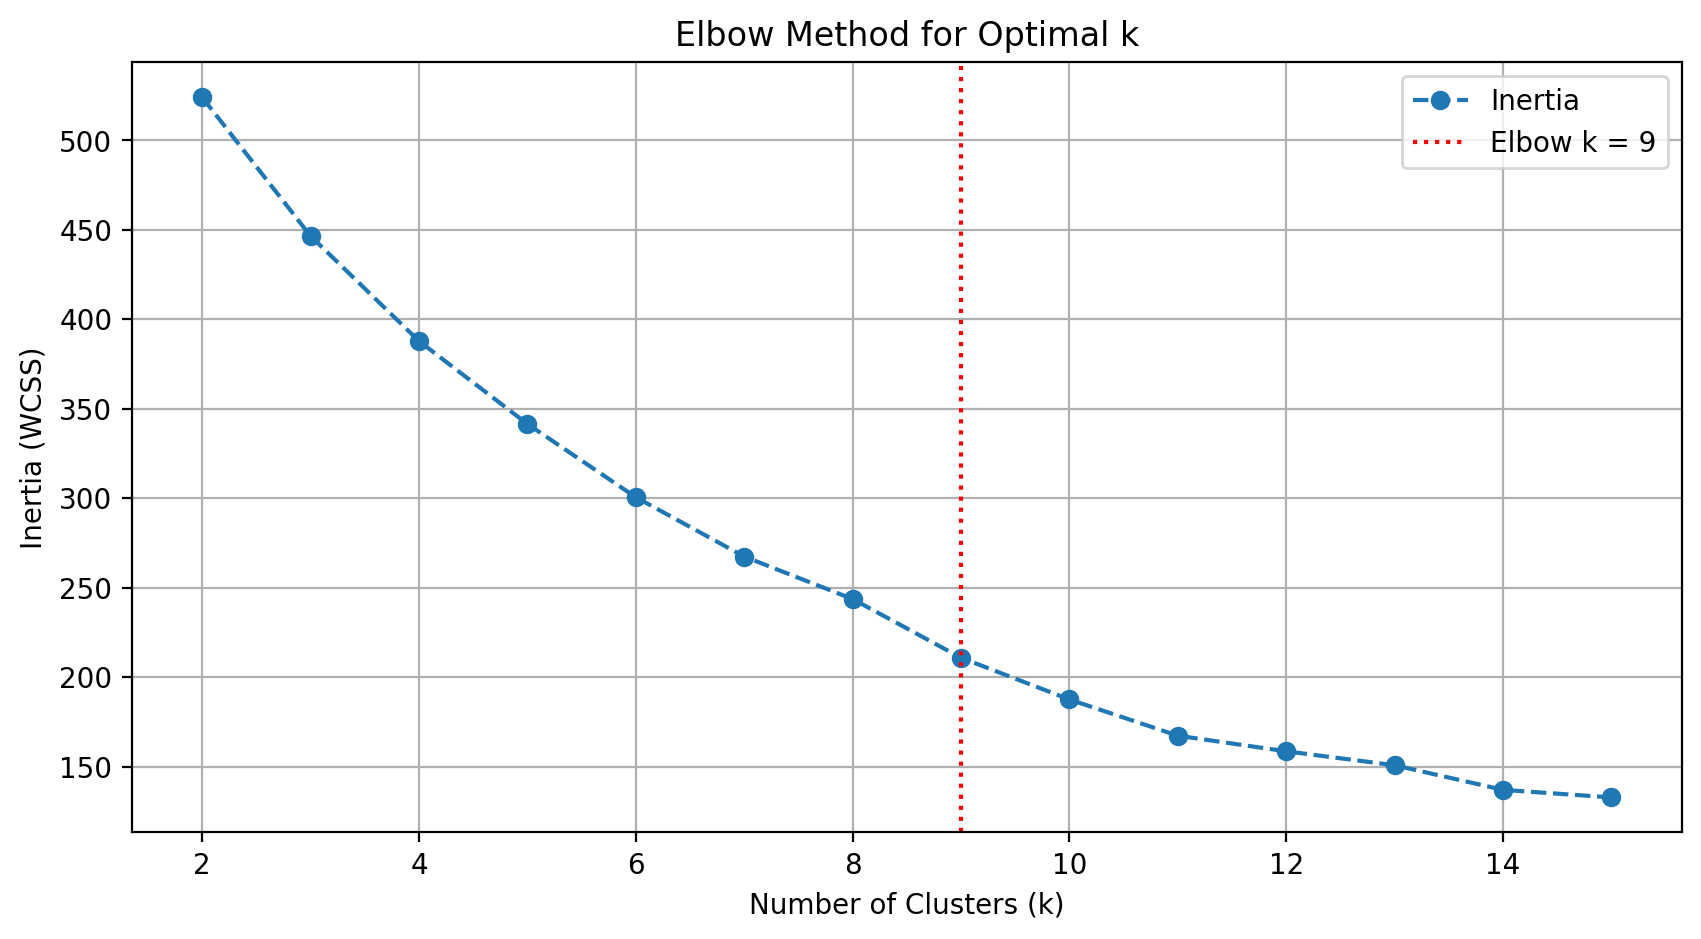

<Figure size 1000x500 with 0 Axes>

Text(0.5, 0, 'Number of Clusters (k)')

Text(0, 0.5, 'Silhouette Score')

Text(0.5, 1.0, 'Silhouette Score for Different k Values')

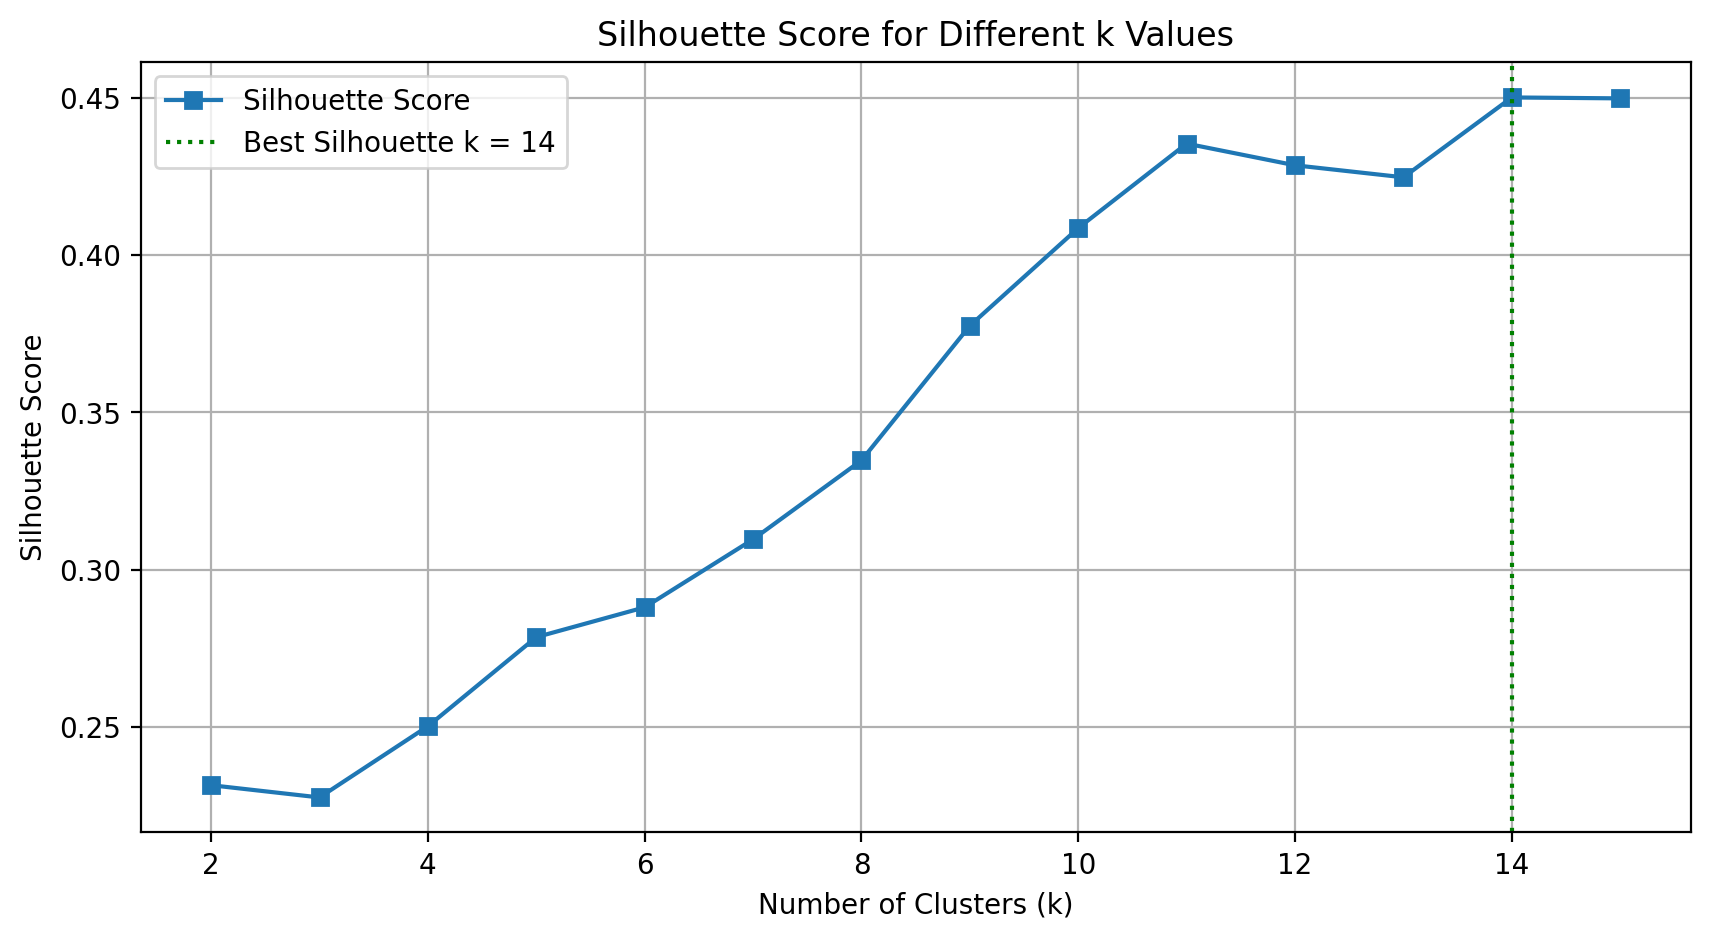

Optimal k from Elbow Method: 9
Optimal k from Silhouette Score: 14 (Score = 0.450)


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
import matplotlib.pyplot as plt

# Set the range of k values
k_range = range(2, 16)
inertia_values = []
silhouette_scores = []

# Loop through and fit KMeans for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init='auto')
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Find best k based on Silhouette Score
best_k_silhouette = k_range[np.argmax(silhouette_scores)]

# Find Elbow Point using KneeLocator
knee_locator = KneeLocator(k_range, inertia_values, curve='convex', direction='decreasing')
best_k_elbow = knee_locator.elbow

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia_values, marker='o', linestyle='--', label='Inertia')
plt.axvline(x=best_k_elbow, color='red', linestyle=':', label=f'Elbow k = {best_k_elbow}')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.legend()
plt.grid(True)
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='s', linestyle='-', label='Silhouette Score')
plt.axvline(x=best_k_silhouette, color='green', linestyle=':', label=f'Best Silhouette k = {best_k_silhouette}')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different k Values")
plt.legend()
plt.grid(True)
plt.show()

# Print suggestions
print(f"Optimal k from Elbow Method: {best_k_elbow}")
print(f"Optimal k from Silhouette Score: {best_k_silhouette} (Score = {max(silhouette_scores):.3f})")


Based on the Elbow Method plot, we can see that the number of clusters as 7 is the optimal one because it is the point where adding more clusters doesn't dignificantly decrease inertia. We are using Elbow method to see what is the optimal number of clusters, the elbow method will show us how close wach instance to centroid of each clusters.
But, the Silhouette Score measures how well data points fit within their assigned clusters. In this case, the number of clusters as 13 gets the highest silhouette score. But our dataset is very small like 600 so I go with 7 as the optimal number of clsuters.





6. **Build the K-Means Clustering Model**:
   - Train a **K-Means clustering model** using the optimal `k` value.
   - Assign customer records to clusters.


In [ ]:
optimal_k = 9
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
data['Cluster'] = kmeans_optimal.fit_predict(scaled_data)

In [ ]:
# Extract the cluster centroids
centroids = kmeans_optimal.cluster_centers_
print("Centroids:")
print(centroids)
# invert the scaling for centroids
original_centroids = min_max_scaler.inverse_transform(centroids)
print("Centroids (Original Scale):")
print(original_centroids)

Centroids:
[[1.00000000e+00 3.55474021e-01 1.11022302e-16 3.27485380e-01
  3.33066907e-16 3.33066907e-16]
 [0.00000000e+00 3.72988379e-01 1.11022302e-16 2.98245614e-01
  4.99600361e-16 3.88578059e-16]
 [0.00000000e+00 3.87583480e-01 1.11022302e-16 3.22580645e-01
  1.00000000e+00 3.33066907e-16]
 [1.00000000e+00 3.53576562e-01 2.81250000e-01 3.02083333e-01
  3.88578059e-16 1.00000000e+00]
 [1.00000000e+00 3.94829811e-01 1.00000000e+00 3.38624339e-01
  5.23809524e-01 3.33066907e-16]
 [0.00000000e+00 4.14516287e-01 1.00000000e+00 4.07843137e-01
  6.00000000e-01 2.11764706e-01]
 [5.95238095e-01 4.04984266e-01 2.14285714e-01 2.97619048e-01
  1.00000000e+00 1.00000000e+00]
 [0.00000000e+00 3.81197178e-01 4.65116279e-01 3.25581395e-01
  5.55111512e-17 1.00000000e+00]
 [1.00000000e+00 4.03171777e-01 1.11022302e-16 4.04040404e-01
  1.00000000e+00 3.33066907e-16]]
Centroids (Original Scale):
[[1.00000000e+00 2.56728991e+04 1.11022302e-16 9.82456140e-01
  3.33066907e-16 3.33066907e-16]
 [0.000000


7. **Cluster Visualization**:
   - Create a **2D** or **3D visualization** of the clustered data.



Text(0.5, 0.92, '3D Cluster Visualization (k=9)')

Text(0.5, 0, 'PCA 1')

Text(0.5, 0.5, 'PCA 2')

Text(0.5, 0, 'PCA 3')

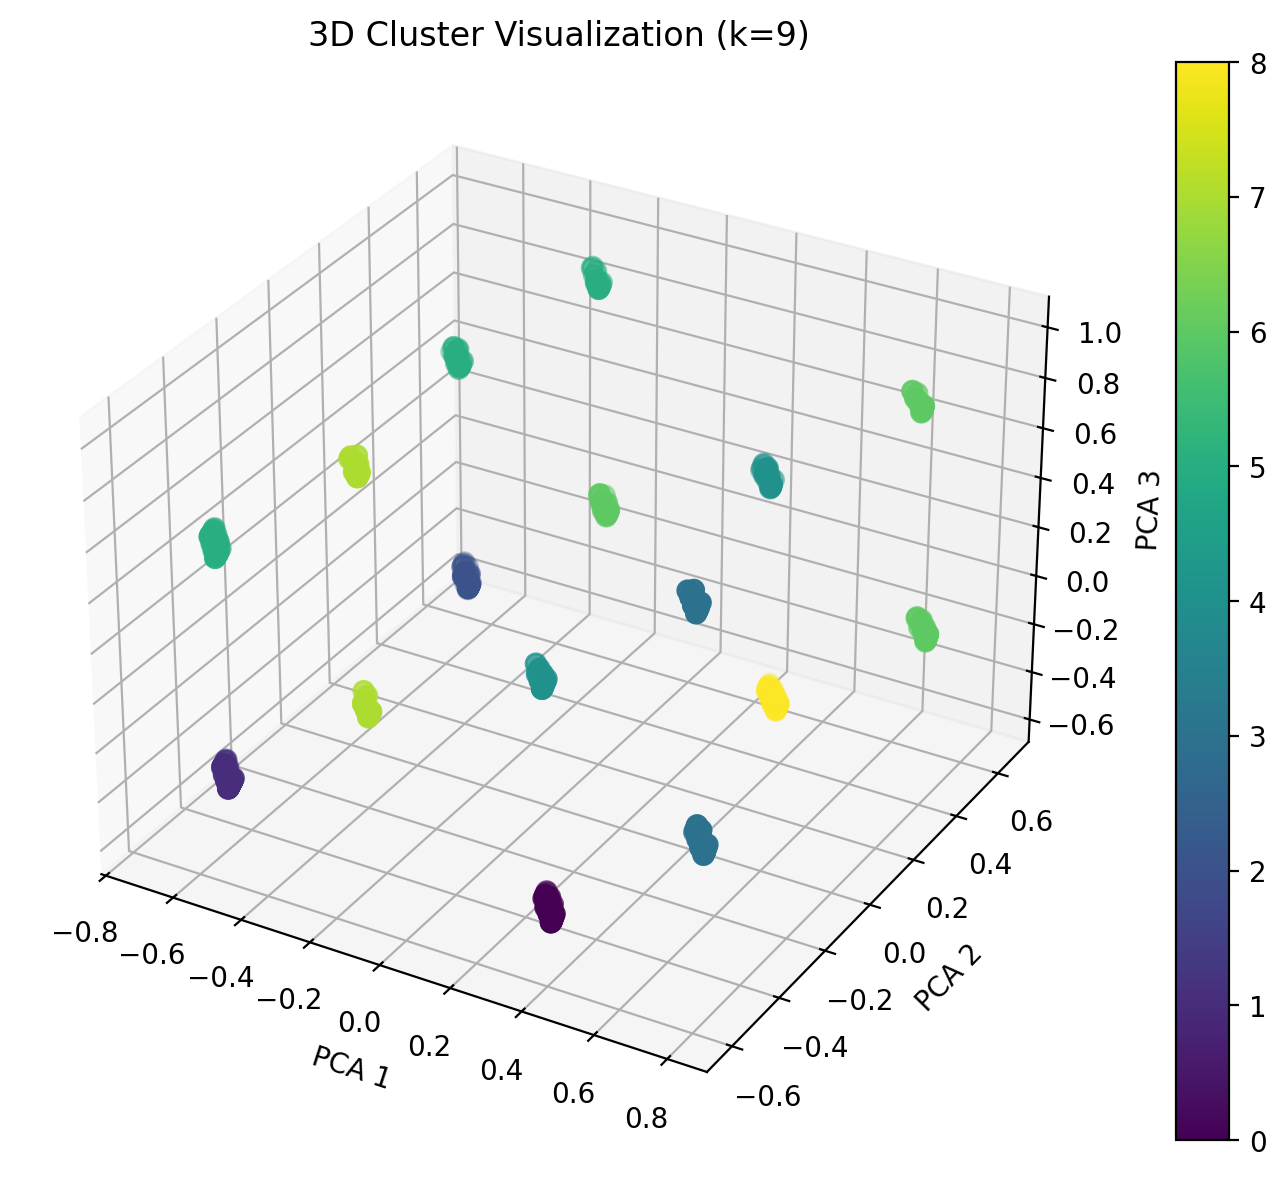

In [ ]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Use the optimal_k from silhouette score
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(scaled_data)

# Reduce to 3 components
pca_3d = PCA(n_components=3)
pca_data_3d = pca_3d.fit_transform(scaled_data)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(pca_data_3d[:, 0], pca_data_3d[:, 1], pca_data_3d[:, 2],
                c=cluster_labels, cmap='viridis', s=50)
ax.set_title(f'3D Cluster Visualization (k={optimal_k})')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.colorbar(sc)
plt.show()


The provided code generates a 3D scatter plot to visualize the results of a K-Means clustering algorithm. Let's break down the interpretation:

1. **Data Reduction:**  The code first uses Principal Component Analysis (PCA) to reduce the dimensionality of the data from its original number of features to just three principal components.  PCA identifies the three directions in the data that explain the most variance.  This makes it possible to visualize the data in 3D.  The resulting `pca_data_3d` contains the data points represented in this new 3D space.

2. **Clustering:**  K-Means clustering has already been performed on the *scaled* data (`scaled_data`). The `cluster_labels` variable holds the cluster assignment for each data point.  Each data point belongs to one of the `optimal_k` clusters (in this case, determined by the silhouette score).

3. **3D Scatter Plot:** The code then creates a 3D scatter plot.

    * **Axes:** The x, y, and z axes represent the first, second, and third principal components, respectively. These components are linear combinations of the original features, capturing the most important variance in the data.
    * **Points:** Each point in the plot represents a customer from the dataset.
    * **Color:**  The color of each point indicates its assigned cluster. The `viridis` colormap is used, so different clusters will be represented by different colors. A colorbar is included to show the mapping between colors and cluster labels.
    * **Separation:**  Examine how well-separated the clusters are in the 3D space.  Ideally, clusters should form distinct groups, with minimal overlap.  If the clusters are well-separated, it indicates that the chosen features and clustering algorithm effectively distinguished the customer segments.  If clusters overlap significantly, it might suggest that the selected features are not the best for distinguishing customer segments, or the number of clusters (k) is not optimal.

**Interpreting the Plot:**

* **Well-Separated Clusters:** If you see distinct groups of points with different colors, it indicates that the K-Means algorithm has successfully identified different customer segments based on the selected features.  Look for clear separations between clusters.
* **Overlapping Clusters:** If you see a lot of intermingling of colors, it might mean that the chosen features don't clearly separate the customer groups or that you might need to reconsider the number of clusters.
* **Cluster Density:** Observe the density of points within each cluster. Dense clusters indicate a more homogeneous group of customers, while sparse clusters may represent smaller or less well-defined segments.
* **Outliers:** Look for data points that appear far away from any cluster.  These could be outliers or unusual customers.  You might investigate these cases further.

**In summary,** this plot gives a visual representation of how the customers group together according to the K-Means algorithm. The goal is to understand if there are meaningful customer segments in the data and how those segments are distributed along the key dimensions identified by the PCA.


8. **Verification & Interpretation**:
   - Print sample cluster assignments.
   - Summarize key insights from the clustering results.

In [ ]:
# Add cluster labels to the original dataframe
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = cluster_labels


In [ ]:
# Print a few sample rows from each cluster
for cluster_id in range(optimal_k):
    print(f"\n--- Sample Customers from Cluster {cluster_id} ---")
    display(data_with_clusters[data_with_clusters['Cluster'] == cluster_id].head(5))



--- Sample Customers from Cluster 0 ---


,Gender,Income,Marital_Status,Children,Car_Loan,Home_Mortgage,Cluster
20,1,57880.7,0,2,0,0,0
21,1,16497.3,0,2,0,0,0
22,1,38446.6,0,0,0,0,0
29,1,24270.1,0,1,0,0,0
51,1,23894.8,0,0,0,0,0



--- Sample Customers from Cluster 1 ---


,Gender,Income,Marital_Status,Children,Car_Loan,Home_Mortgage,Cluster
3,0,20375.4,0,3,0,0,1
4,0,50576.3,0,0,0,0,1
5,0,37869.6,0,2,0,0,1
10,0,59803.9,0,0,0,0,1
18,0,26909.2,0,0,0,0,1



--- Sample Customers from Cluster 2 ---


,Gender,Income,Marital_Status,Children,Car_Loan,Home_Mortgage,Cluster
2,0,16575.4,0,0,1,0,2
8,0,25304.3,0,2,1,0,2
38,0,18504.3,0,0,1,0,2
41,0,26952.6,0,0,1,0,2
49,0,17867.3,0,2,1,0,2



--- Sample Customers from Cluster 3 ---


,Gender,Income,Marital_Status,Children,Car_Loan,Home_Mortgage,Cluster
14,1,19474.6,0,0,0,1,3
26,1,20809.7,0,0,0,1,3
40,1,26774.2,0,0,0,1,3
45,1,52670.6,0,2,0,1,3
47,1,13106.6,1,2,0,1,3



--- Sample Customers from Cluster 4 ---


,Gender,Income,Marital_Status,Children,Car_Loan,Home_Mortgage,Cluster
6,1,8877.07,1,0,0,0,4
24,1,12640.30,1,2,1,0,4
34,1,37521.90,1,0,0,0,4
42,1,55716.50,1,2,1,0,4
48,1,39547.80,1,2,1,0,4



--- Sample Customers from Cluster 5 ---


,Gender,Income,Marital_Status,Children,Car_Loan,Home_Mortgage,Cluster
0,0,17546.0,1,1,0,0,5
11,0,26658.8,1,0,1,1,5
23,0,15538.8,1,0,1,1,5
28,0,29359.1,1,3,1,1,5
33,0,29921.3,1,3,1,0,5



--- Sample Customers from Cluster 6 ---


,Gender,Income,Marital_Status,Children,Car_Loan,Home_Mortgage,Cluster
1,1,30085.1,0,3,1,1,6
13,0,55204.7,0,1,1,1,6
15,0,22342.1,0,0,1,1,6
25,1,41034.0,0,0,1,1,6
43,0,27571.5,0,0,1,1,6



--- Sample Customers from Cluster 7 ---


,Gender,Income,Marital_Status,Children,Car_Loan,Home_Mortgage,Cluster
12,0,15735.8,0,1,0,1,7
16,0,17729.8,0,2,0,1,7
17,0,41016.0,0,0,0,1,7
60,0,24763.3,0,1,0,1,7
67,0,34892.9,1,0,0,1,7



--- Sample Customers from Cluster 8 ---


,Gender,Income,Marital_Status,Children,Car_Loan,Home_Mortgage,Cluster
7,1,24946.6,0,0,1,0,8
9,1,24212.1,0,2,1,0,8
19,1,22522.8,0,0,1,0,8
32,1,23443.2,0,1,1,0,8
36,1,10953.0,0,3,1,0,8


In [ ]:
# Step 1: Compute mean for only numerical continuous features
numeric_means = data_with_clusters.groupby('Cluster')['Income'].mean().round(2)

# Step 2: Compute mode for categorical and discrete count features
categorical_modes = data_with_clusters.groupby('Cluster')[['Children', 'Gender', 'Marital_Status', 'Car_Loan', 'Home_Mortgage']].agg(lambda x: x.mode().iloc[0])

# Step 3: Combine into one summary table
cluster_summary = pd.concat([numeric_means, categorical_modes], axis=1)

# Step 4: Convert encoded categorical values back to original labels
for col in ['Gender', 'Marital_Status', 'Car_Loan', 'Home_Mortgage']:
    cluster_summary[col] = cluster_summary[col].apply(lambda x: label_encoders[col].inverse_transform([int(float(x))])[0])

# Step 5: Display the combined summary
print("Cluster Summary:")
display(cluster_summary)

# Step 6: Generate readable insights
def generate_insights(summary_df):
    insights = []
    for cluster_id, row in summary_df.iterrows():
        desc = f"🔹 Cluster {cluster_id}:\n"
        desc += f"- Average Income: ${row['Income']:,.0f}\n"
        desc += f"- Most have {int(row['Children'])} children.\n"
        desc += f"- Predominantly {row['Gender']} customers.\n"
        desc += f"- Mostly {row['Marital_Status']} customers.\n"
        desc += f"- Car Loan: {row['Car_Loan']}\n"
        desc += f"- Home Mortgage: {row['Home_Mortgage']}\n"
        insights.append(desc)
    return insights

# Print insights
print("\nCluster Insights:")
insights = generate_insights(cluster_summary)
for insight in insights:
    print(insight)

Cluster Summary:


,Income,Children,Gender,Marital_Status,Car_Loan,Home_Mortgage
Cluster,,,,,,
0,25672.90,0,Male,Married,No,No
1,26690.76,0,Female,Married,No,No
2,27538.97,0,Female,Married,Yes,No
3,25562.63,0,Male,Married,No,Yes
4,27960.10,0,Male,Single,Yes,No
5,29104.19,0,Female,Single,Yes,No
6,28550.23,0,Male,Married,Yes,Yes
7,27167.82,0,Female,Married,No,Yes
8,28444.90,1,Male,Married,Yes,No



Cluster Insights:
🔹 Cluster 0:
- Average Income: $25,673
- Most have 0 children.
- Predominantly Male customers.
- Mostly Married customers.
- Car Loan: No
- Home Mortgage: No

🔹 Cluster 1:
- Average Income: $26,691
- Most have 0 children.
- Predominantly Female customers.
- Mostly Married customers.
- Car Loan: No
- Home Mortgage: No

🔹 Cluster 2:
- Average Income: $27,539
- Most have 0 children.
- Predominantly Female customers.
- Mostly Married customers.
- Car Loan: Yes
- Home Mortgage: No

🔹 Cluster 3:
- Average Income: $25,563
- Most have 0 children.
- Predominantly Male customers.
- Mostly Married customers.
- Car Loan: No
- Home Mortgage: Yes

🔹 Cluster 4:
- Average Income: $27,960
- Most have 0 children.
- Predominantly Male customers.
- Mostly Single customers.
- Car Loan: Yes
- Home Mortgage: No

🔹 Cluster 5:
- Average Income: $29,104
- Most have 0 children.
- Predominantly Female customers.
- Mostly Single customers.
- Car Loan: Yes
- Home Mortgage: No

🔹 Cluster 6:
- Aver

In [ ]:
print(cluster_summary.dtypes)


Income            float64
Children            int64
Gender             object
Marital_Status     object
Car_Loan           object
Home_Mortgage      object
dtype: object


<Figure size 800x400 with 0 Axes>

<Axes: xlabel='Cluster'>

Text(0.5, 1.0, 'Average Income by Cluster')

Text(0.5, 0, 'Cluster')

Text(0, 0.5, 'Income')

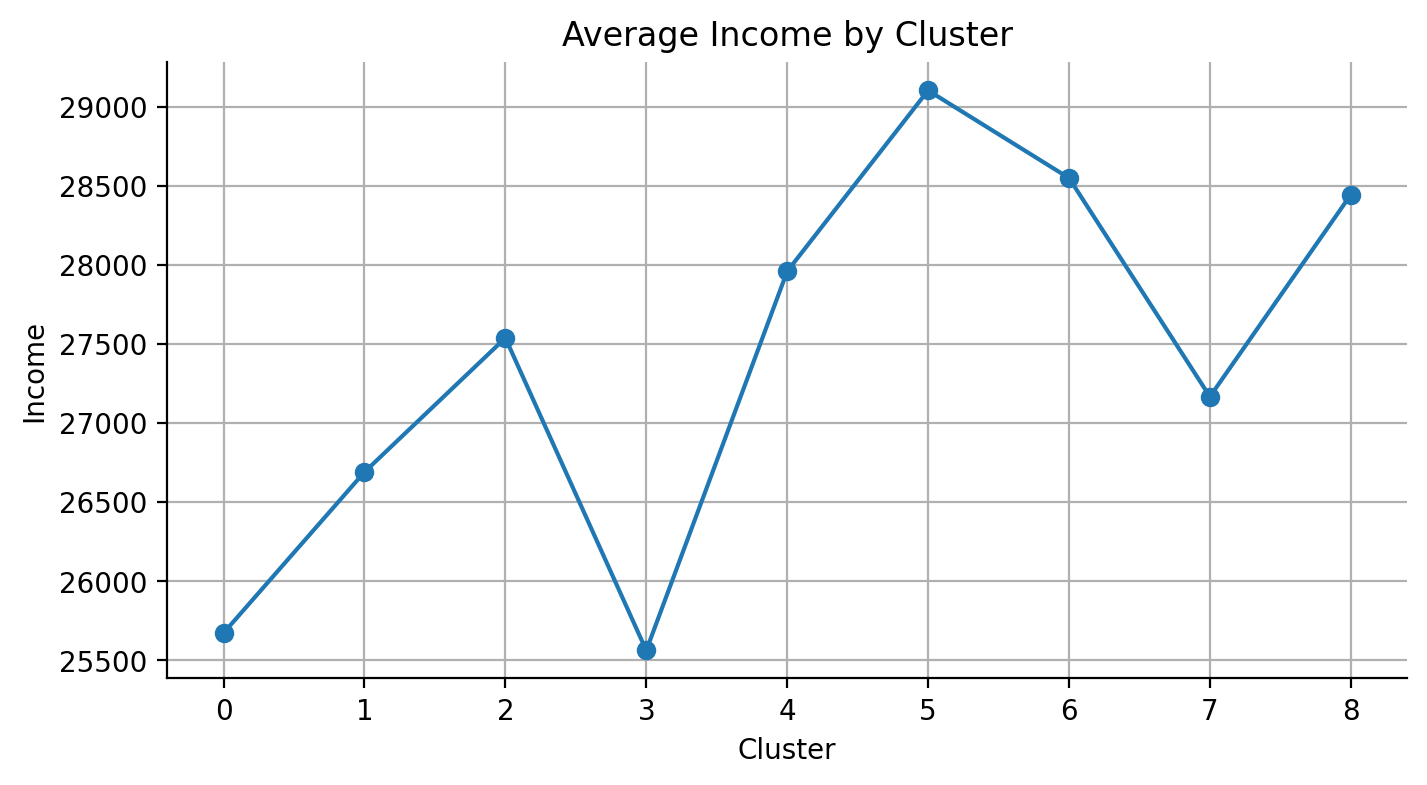

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Car_Loan', ylabel='Marital_Status'>

Text(0.5, 1.0, 'Heatmap: Marital Status vs Car Loan')

Text(0.5, 36.72222222222221, 'Car Loan')

Text(70.72222222222221, 0.5, 'Marital Status')

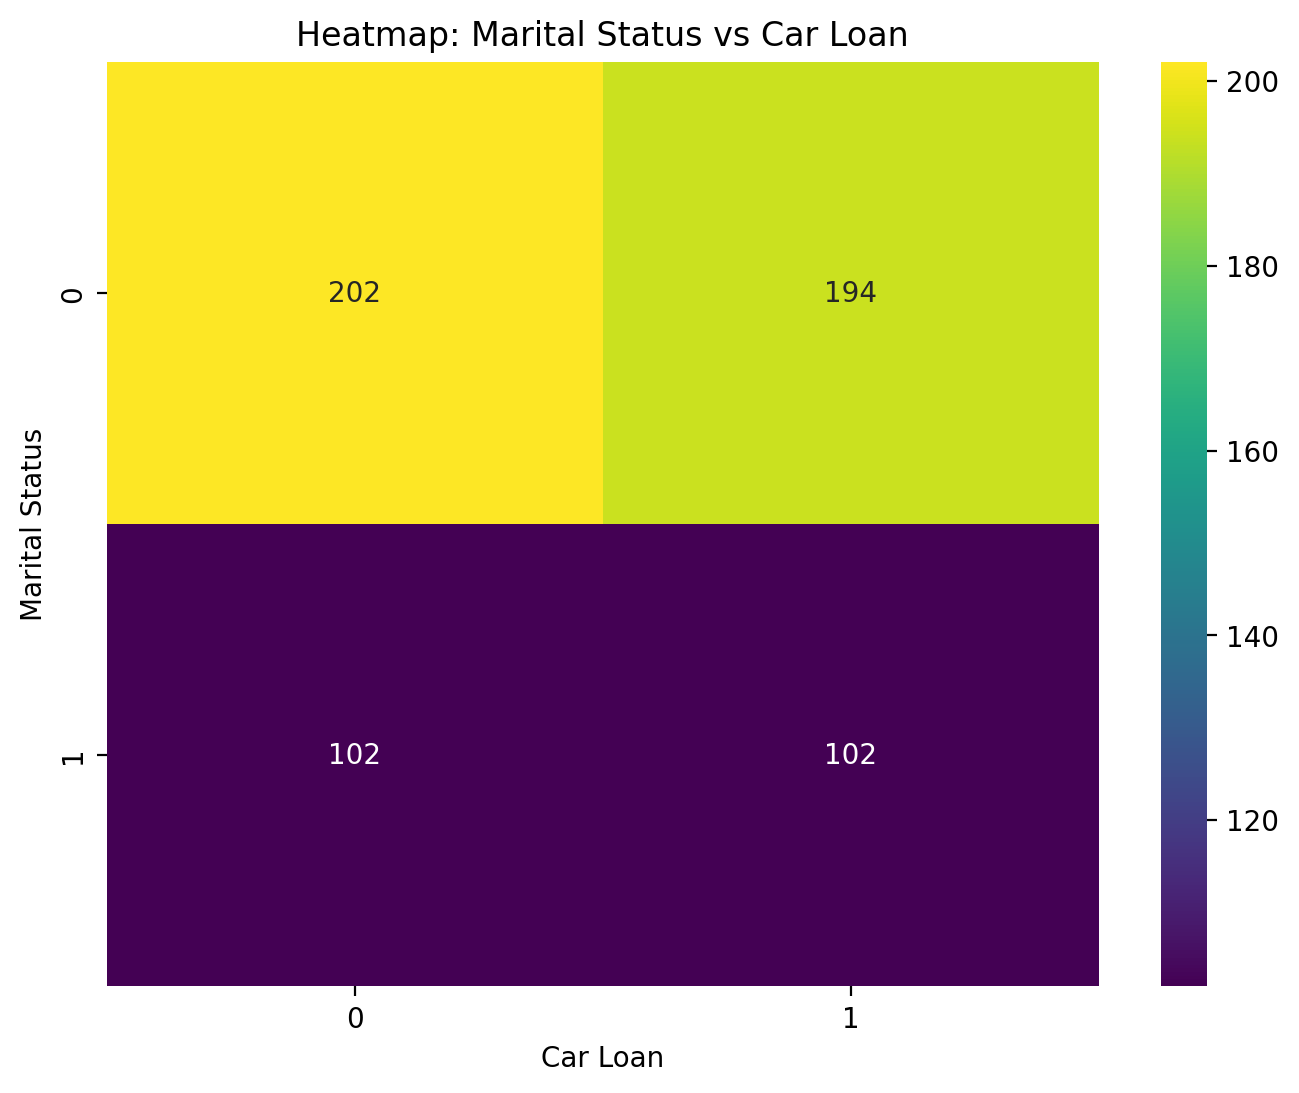

In [ ]:
# Plot 1: Income by Cluster
plt.figure(figsize=(8, 4))
cluster_summary['Income'].plot(kind='line', marker='o')
plt.title('Average Income by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid(True)
plt.show()

# Plot 3: Heatmap of Car Loan vs Marital Status
# Use original data with cluster labels for value counts
heatmap_df = pd.crosstab(data_with_clusters['Marital_Status'], data_with_clusters['Car_Loan'])

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_df, annot=True, cmap='viridis', fmt='d')
plt.title('Heatmap: Marital Status vs Car Loan')
plt.xlabel('Car Loan')
plt.ylabel('Marital Status')
plt.show()

<Axes: title={'center': 'Income'}, xlabel='Cluster'>

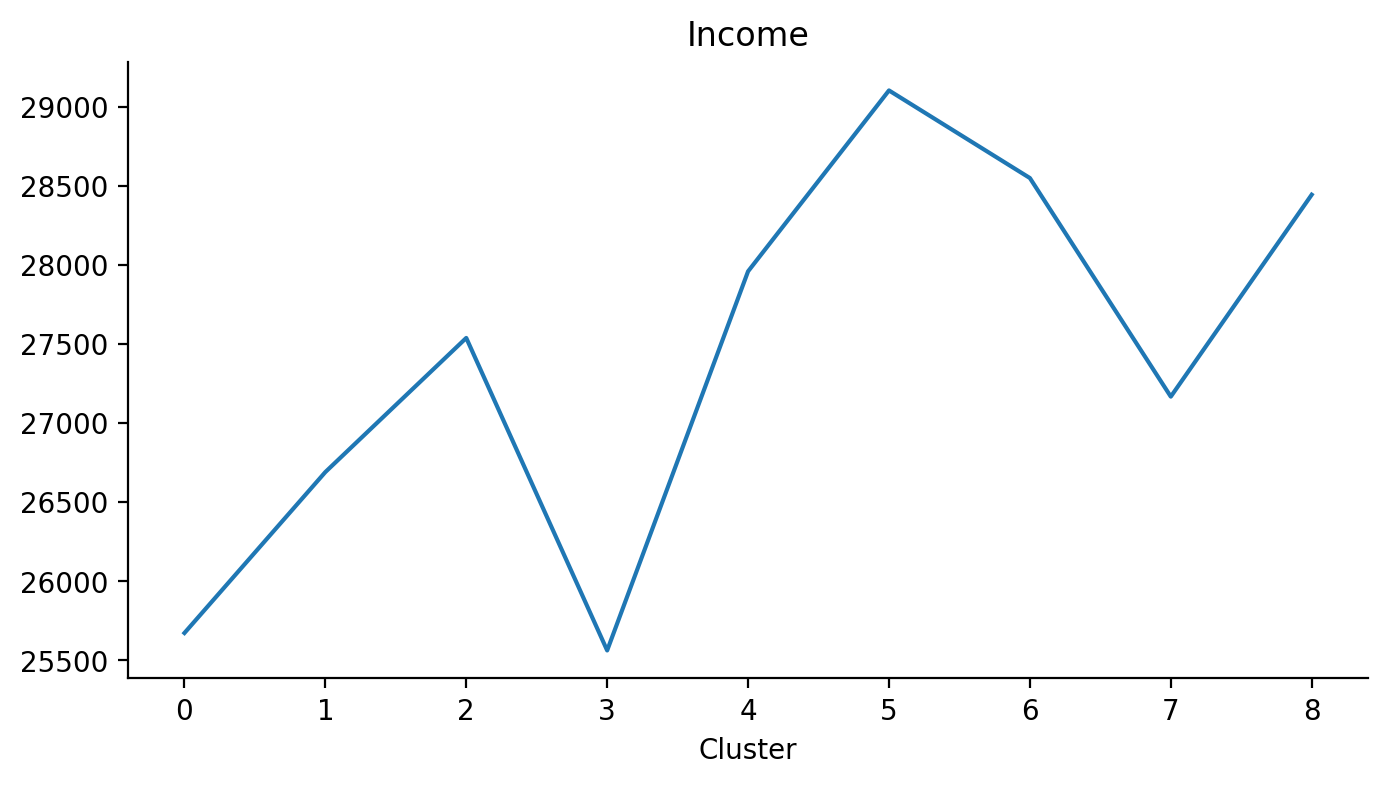

In [ ]:
from matplotlib import pyplot as plt
cluster_summary['Income'].plot(kind='line', figsize=(8, 4), title='Income')
plt.gca().spines[['top', 'right']].set_visible(False)



<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Cluster', ylabel='Income'>

Text(0.5, 1.0, 'Income Distribution by Cluster')

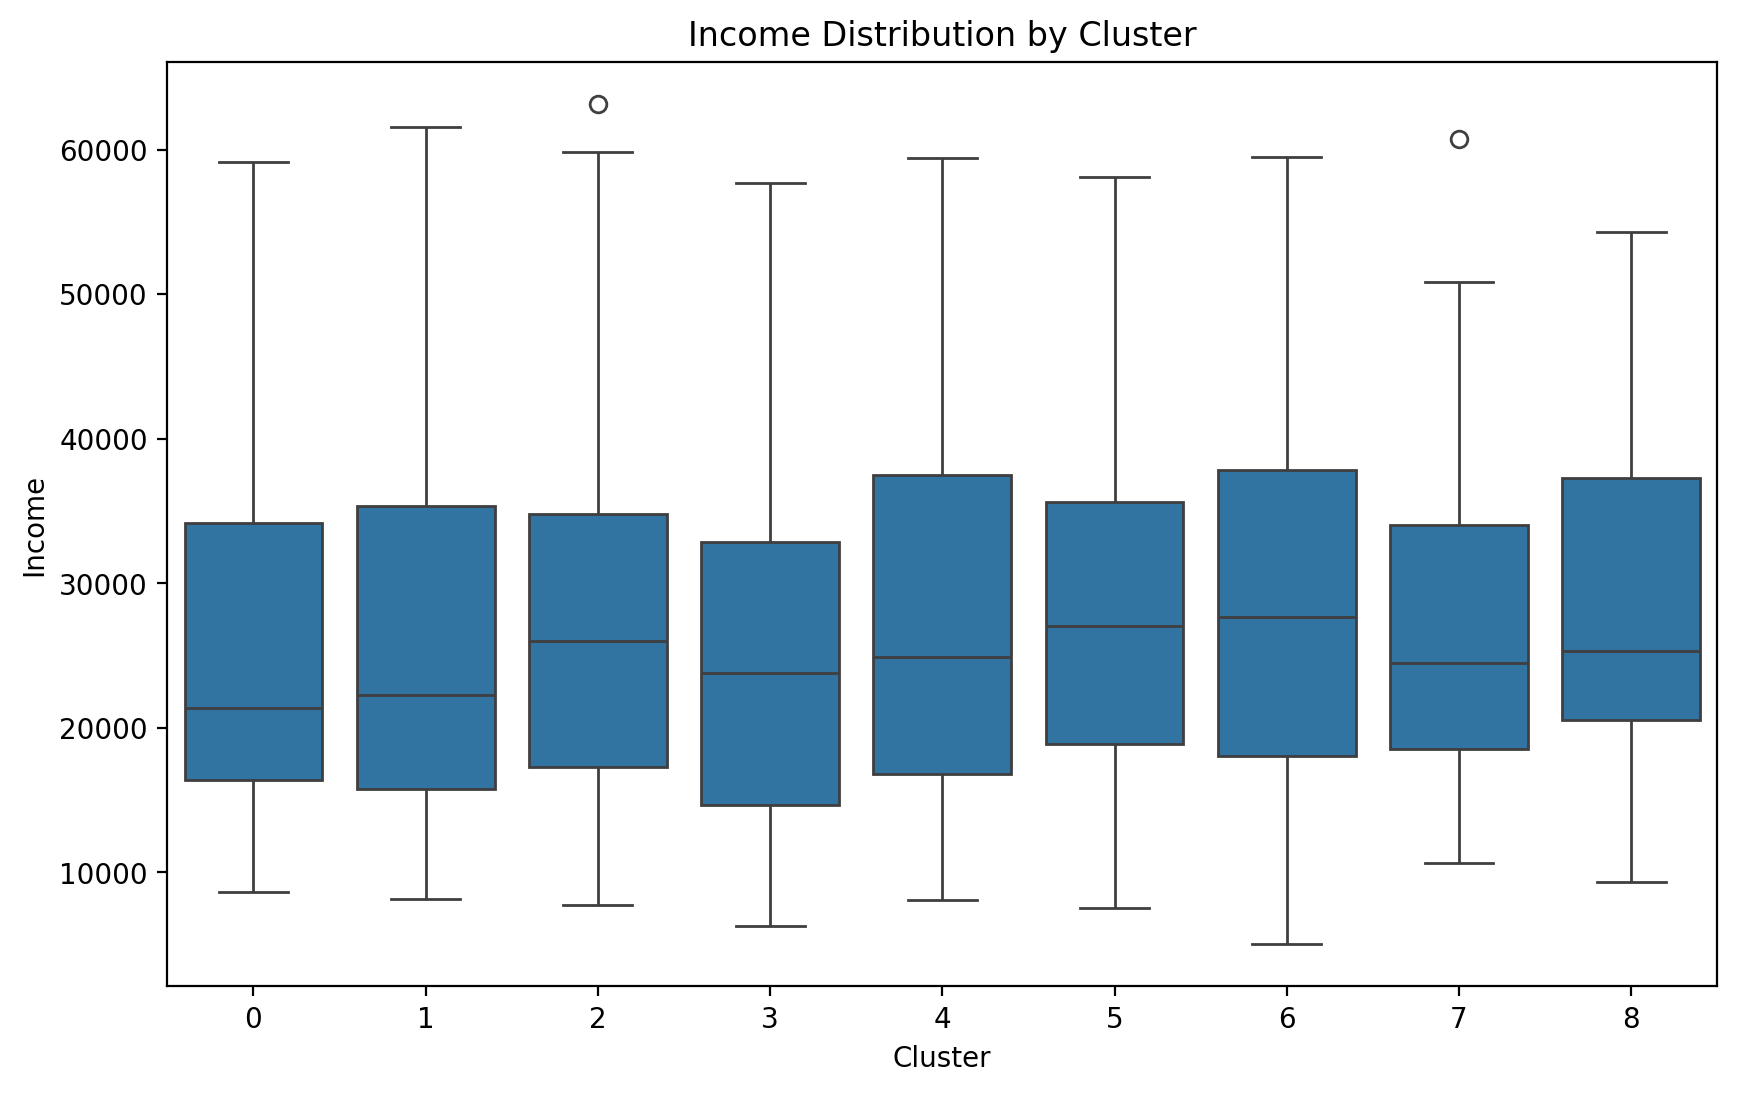

In [ ]:
# Boxplot of income by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Income', data=data_with_clusters)
plt.title("Income Distribution by Cluster")
plt.show()
